Introduction
--------------

The Fourier Transform is ubiquitous, but it has singular standing in signal processing because of the way sampling imposes a bandwidth-centric view of the world.  The Discrete Fourier Transform (DFT) is the primary analysis tool for exploring this perspective. Our development unconventionally starts with a matrix/vector representation of the DFT because that facilitates our visual approach which in turn is designed to develop intuition about the operation and usage of the DFT in practice.

Let us start with the following DFT matrix

$$ \mathbf{U} = \frac{1}{\sqrt N} \left[ \exp \left( j \frac{2\pi}{N} n k \right) \right]_{n\in\{0,N_s-1\},k\in\{0,N-1\}} $$

where $n$ counts rows through the number of samples and $k$ indexes the discrete frequencies as columns. 

The following figure shows the discrete frequencies on the unit circle and their corresponding real and imaginary parts that are the columns of $\mathbf{U}$.

Text(0.5, 0, 'n')

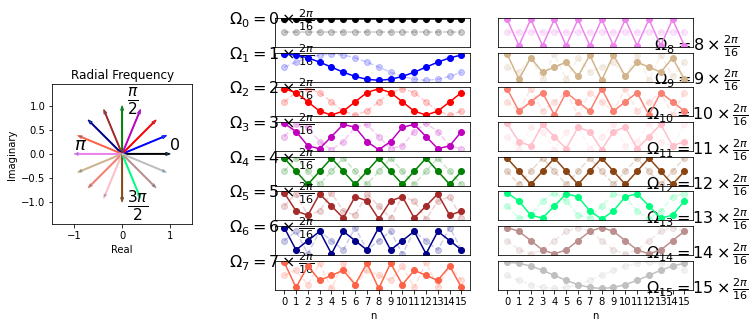

In [12]:
# rewrite on python 3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.array(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)

Nfft=16
v = np.ones((16, 1))
U = dftmatrix(Nfft=Nfft, N=16)

# --- 
# hardcoded constants to format complicated figure

gs = gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)

fig = plt.figure(figsize=(10,5))
ax0 = plt.subplot(gs[:,:3])
fig.add_subplot(ax0)

ax0.set_aspect(1)
a=2*np.pi/Nfft*np.arange(Nfft)

colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan','Salmon','Pink',
          'SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]
for j,i in enumerate(a):
  ax0.add_patch( FancyArrow(0, 0, np.cos(i), np.sin(i), width=0.02,
                            length_includes_head=True, edgecolor=colors[j]))

ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(np.array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency')
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the middle column
for i in range(8):
  ax = plt.subplot(gs[i,4:8])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i,i),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i],'-o',color=colors[i])
  ax.plot(U.imag[:,i],'--o',color=colors[i],alpha=0.2)
  ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')

# plots in the far right column
for i in range(8):
  ax = plt.subplot(gs[i,8:])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i+8],'-o',color=colors[i+8])
  ax.plot(U.imag[:,i+8],'--o',color=colors[i+8],alpha=0.2)
  ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
  ax.yaxis.set_label_position('right')
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

On the left, the figure shows the discrete frequencies corresponding to each of the columns of the $\mathbf{U}$ matrix. These are color coded corresponding to the graphs on the right. For example, the $k=1$ column of the $\mathbf{U}$ matrix (i.e. $ \mathbf{u}_1 $) corresponds to discrete frequency $\Omega_1=\frac{2\pi}{16}$ marked on the y-axis label which is shown in the second row down the middle column in the figure. The real part of $ \mathbf{u}_1 $ is plotted in bold and the corresponding imaginary part is plotted semi-transparent because it is just an out-of-phase version of the real part. These real/imaginary parts shown in the graphs correspond to the conjugacy relationships on the leftmost radial plot. For example, $\Omega_1$ and $\Omega_{15}$ are complex conjugates and their corresponding imaginary parts are inverted as shown in the plots on the right. 

The rows of the matrix correspond to the sample index given a particular sampling frequency, $f_s$. This means that if we have $N_s$ samples, then we have sampled a time duration over $N_s/f_s$. However, if we are only given a set of samples without the sampling frequency, then  we can say  nothing about time.  For this reason, you will find discussions based on discrete frequency (i.e. between zero and $2\pi$) that do not reference  sample rates. Thus, $N$ frequencies either divide the unit circle in discrete frequencies between 0 and $2\pi$ or divide the sample rate into sampled frequencies between zero and $f_s$. There is a one-to-one relationship between discrete and sampling frequency. In particular, we have for discrete frequency,

$$ \Omega_k = \frac{2\pi}{N} k $$

and for sampled frequency,

$$ f_k = \frac{f_s}{N} k $$

for the same value of $k$. Note that $\Omega_k$ is periodic with period $N$ (one full turn around the circle). One immediate consequence of the one-to-one correspondence between $\Omega_k$ and $f_k$ is that when $k=N/2$, we have $\Omega_{N/2}=\pi$ (halfway around the circle) and $f_{N/2}=f_s/2$ which is another way of saying that the Nyquist rate (the highest frequency we can unambiguously sample) occurs when $ \Omega_{N/2} = \pi$. We can see this by noting that as the discrete frequency rotates counter-clockwise away from zero and towards $\pi$, the plots on the right get more and more jagged. These also get smoother as the discrete frequency continues to rotate counter-clockwise towards zero again. This is because the higher frequencies are those close to $\pi$ and the lower frequencies are those close to zero on the complex plane.  We will explore these crucial relationships further later, but for now, let's consider computing the DFT using this matrix.

Computing the DFT
--------------------

To compute the DFT using the matrix, we calculate the following,

$$ \mathbf{\hat{x}} = \mathbf{U}^H \mathbf{x}$$

which individually takes each of the columns of $\mathbf{U}$ and computes the inner product as the $i^{th}$ entry,

$$ \mathbf{\hat{x}}_i = \mathbf{u}_i^H \mathbf{x}$$

That is, we are measuring the *degree of similarity* between each column of $\mathbf{U}$ and the input vector. We can think of this as the coefficient of the projection of $\mathbf{x}$ onto  $\mathbf{u}_i$.

We can retrieve the original input from the DFT by calculating

$$ \mathbf{x} = \mathbf{U} \mathbf{U}^H \mathbf{x} $$

because the columns of $\mathbf{U}$ are orthonormal (i.e. $\mathbf{u}_i^H \mathbf{u}_j = 0$). An important consequence of this is that $||\mathbf{x}||=||\mathbf{\hat{x}}||$ for any $\mathbf{x}$.  This is Parseval's theorem and it  means that the DFT is not *stretching* or *distorting* the input which makes it an ideal analysis tool.

Zero-Padding and Frequency Sampling
------------------------------------------

The only relationship between $N$, the size of the DFT, and the number of samples $N_s$ is that $N \ge N_s$. For implementation reasons, we will always choose $N$ as a power of 2. In the code below, let's now turn to the consquences of choose $N$ much larger that $N_s$. 


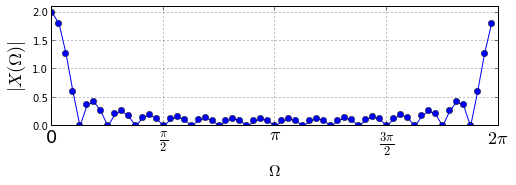

In [2]:
U = dftmatrix(64,16)
x = ones((16,1))
X = U.H*x

fig, ax = subplots()
fig.set_size_inches((8,4))
ax.set_aspect(0.8)
ax.grid()
ax.plot(arange(0,64)*2*pi/64.,abs(X),'o-')
ax.set_ylabel(r'$|X(\Omega)|$',fontsize=18)
ax.set_xticks([0, pi/2., pi, 3*pi/2,2*pi])
ax.set_xlabel(r'$\Omega$',fontsize=16)
ax.axis([0, 2*pi,0,2.1])
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$', r'$2\pi$'],
                   fontsize=18);
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

As you may recall from our [earlier discussion](http://python-for-signal-processing.blogspot.com/2012/09/investigating-sampling-theorem-in-this.html), this plot looks suspiciously like the `sinc` function. If you've been following closely, you may realize that for the above example we had $\mathbf{x}=\mathbf{1}$. But isn't this one of the columns of the $\mathbf{U}$ matrix? If all the columns of that matrix are orthonormal, then why is there is more than one non-zero point on this graph? The subtle point here is that the DFT matrix has dimensions $64 \times 16$. This means that computationally,

$$ \mathbf{U}_{16\times64}^H \mathbf{x} = \mathbf{U}_{64\times64}^H \left[\mathbf{x},\mathbf{0}\right]^T$$

In other words, filling the original $16\times 1$ vector $\mathbf{x}$ with zeros and using a larger compatible $\mathbf{U}_{64\times64}$ matrix has the same effect as using the $\mathbf{U}_{16\times64}$ matrix. The answer to the question is therefore that $\mathbf{x} = \mathbf{1}_{16\times1} \ne \left[ \mathbf{1}_{16\times1},\mathbf{0}\right]^T$ and the zero-augmented ones vector is *not* orthnormal to any columns in $\mathbf{U}_{64\times64}$.  This explains why there are so many non-zero points on the graph at different discrete frequencies.

Let's drive this point home in the next figure.

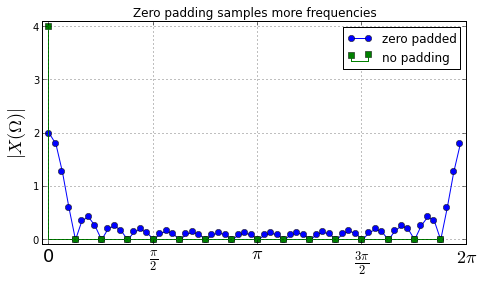

In [3]:
U = dftmatrix(64,16)
x = ones((16,1))
X = U.H*x

fig,ax=subplots()
fig.set_size_inches((8,4))

ax.set_aspect(0.8)
ax.grid()
ax.plot(arange(0,64)*2*pi/64.,abs(X),'o-',label='zero padded')
ax.stem(arange(0,16)*2*pi/16.,abs(dftmatrix(16).H*x),
        markerfmt='gs', basefmt='g-',linefmt='g-',
        label='no padding')
ax.set_ylabel(r'$|X(\Omega)|$',fontsize=18)
ax.set_xticks([0, pi/2., pi, 3*pi/2,2*pi])
ax.axis([-.1, 2*pi,-.1,4.1])
ax.legend(loc=0)
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$', r'$2\pi$'],
                   fontsize=18);
ax.set_title('Zero padding samples more frequencies');
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)


In the figure above, without zero-padding, $\mathbf{x}$ is the $ 0^{th} $ column of the 16-point DFT matrix and so all the coefficients except for the $0^{th}$ column are zero due to orthonormality (shown by the green squares).  But, the zero-padded 64-element-long $\mathbf{x}$ vector is definitely *not* a column of the 64-point DFT matrix so we would *not* expect all the other terms to be zero. In fact, the other terms account for the 64 discrete frequencies that are plotted above. This means that zero-padding $\mathbf{x}$ and using the 64-point DFT matrix analyzes the signal across more frequencies. 

Notice that for the $ 0^{th}$ frequency the height of the DFT magnitude is different for the zero-padded constant signal compared to the unpadded version. Recall from Parseval's theorem that $ ||\mathbf{x}||=||\mathbf{\hat{x}}|| $ but this does not account for how the signal may be spread across frequency. In the unpadded case, *all* of the signal energy is concentrated in the $ \mathbf{u}_0 $ column of the DFT matrix because our constant signal is just a scalar multiple of $ \mathbf{u}_0 $. In the padded case, the signal's energy is spread out across more frequencies with smaller signal magnitudes per frequency, thus satisfying Parseval's theorem. In other words, the single non-zero term in the unpadded DFT is smeared out over all the other frequencies in the padded case.

The problem with the figure shown is that it does not emphasize that the discrete frequencies are periodic with period $N$. The following figure below plots the 64-point DFT on the face of a cylinder to emphasize the periodicity of the discrete frequencies.

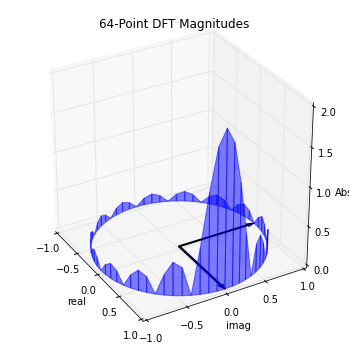

In [4]:
a=2*pi/64.*arange(64)
d=vstack([cos(a),sin(a),array(abs(X)).flatten()]).T

fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-1,1,-1,1])
ax.set_zlim([0,d[:,2].max()])
ax.set_aspect(1)
ax.view_init(azim=-30)

ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('Abs')
ax.set_title('64-Point DFT Magnitudes')

def facet_filled(x,alpha=0.5,color='b'):
    'construct 3D facet from adjacent points filled to zero'
    a,b=x
    a0= a*array([1,1,0])
    b0= b*array([1,1,0])
    ve = vstack([a,a0,b0,b])      # create closed polygon facet
    poly = Poly3DCollection([ve]) # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly

sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
for s in sl:
  poly=facet_filled(d[s,:])
  ax.add_collection3d(poly)
 
# edge polygons    
ax.add_collection3d(facet_filled(d[[-1,0],:]))
ax.add_collection3d(facet_filled(d[[-2,-1],:]))

# add 0 and pi/2 arrows for reference
a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
ax.add_patch(a)
b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
ax.add_patch(b)
art3d.patch_2d_to_3d(a)
art3d.patch_2d_to_3d(b)
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

The figure above is very important and we will be using it as a glyph in the following. It shows the same magnitude of the $X(\Omega)$ 64-point DFT as before, but now that it is plotted on a cylinder, we can really see the periodic discrete frequencies. The two arrows in the xy-plane show the discrete frequencies zero and $\pi/2$ for reference.  

We will need the following setup code below.

In [5]:
def drawDFTView(X,ax=None,fig=None):
    'above code as a function. Draws 3D diagram given DFT matrix'
    a=2*pi/len(X)*arange(len(X))
    d=vstack([cos(a),sin(a),array(abs(X)).flatten()]).T
    if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6,6)
        
    if ax is None: # add ax to existing figure
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        
    ax.axis([-1,1,-1,1])
    ax.set_zlim([0,d[:,2].max()])
    ax.set_aspect(1)
    ax.view_init(azim=-30)
    a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
    ax.add_patch(a)
    b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a)
    art3d.patch_2d_to_3d(b)
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_zticks([])
    ax.axis('off')

    sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
    for s in sl:
      poly=facet_filled(d[s,:])
      ax.add_collection3d(poly)
     
    # edge polygons    
    ax.add_collection3d(facet_filled(d[[-1,0],:]))
    ax.add_collection3d(facet_filled(d[[-2,-1],:]))

In [6]:
def drawInOut(X,v,return_axes=False):
    fig = plt.figure()
    fig.set_size_inches(8,8)
    gs = gridspec.GridSpec(8,6)
        
    ax1 = plt.subplot(gs[3:5,:2])
    ax2 = plt.subplot(gs[:,2:],projection='3d')
    
    ax1.stem(arange(len(v)),v)
    ymin,ymax= ax1.get_ylim()
    ax1.set_ylim(ymax = ymax*1.2, ymin = ymin*1.2)
    ax1.set_title('input signal')
    ax1.set_xlabel('time sample index')
    ax1.tick_params(labelsize=8)
    
    drawDFTView(X,ax2)
    if return_axes:
        return ax1,ax2

Real Signals and DFT Symmetry
-----------------------------------

Note the symmetric lobes in the following figure showing the DFT of a real signal. The plot on the left is the signal in the sampled time-domain and the plot on the right is its DFT-magnitude glyph.

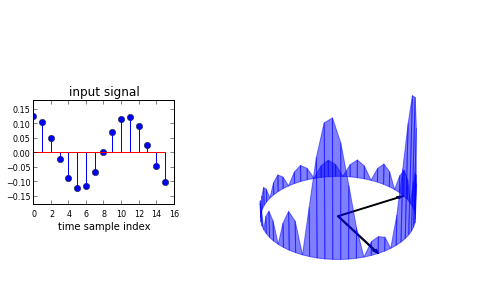

In [7]:
v = U[:,6].real
ax=drawInOut(U.H*v,v,return_axes=True)
# ax.figure.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Because the input signal is real, the DFT is symmetric. To see this, recall that in our first figure we observed for every $\mathbf{u}_i$, we had its complex  conjugate $\mathbf{u}_{N-i}$ and since the real parts of complex conjugates are the same and there is no imaginary part in the input signal, the resulting corresponding inner products are complex conjugates and thus have the same magnitudes.

The next block of code illustrates this.

In [8]:
print abs(U[:,[6,64-6]].H*v) # real signal has same abs() inner product for conjugate columns

[[ 0.125]
 [ 0.125]]


This fact has extremely important computational consequences for the fast implemention of the DFT (i.e. FFT), which we will take up another time. For now, it's enough to recognize the symmetry of the DFT of real signals. 

High/Low-Frequency Signals and Their DFTs
-----------------------------------------------

Now that we have all the vocabulary defined, we can ask one more intuitive question: what does the highest frequency signal (i.e. $\Omega_{N/2}=\pi$) look like in the sampled time-domain? This is shown in the top figure below that shows a signal toggling back and forth positive and negative. Note that the amplitudes of this toggling are not important, it's just the *rate* of toggling that defines the high frequency signal. Also, what does the lowest frequency signal (i.e. $\Omega_0=0$) look like as a sampled signal? This is shown in the bottom figure. Note that it is the mirror image of the high frequency signal.

I invite you to please download the [IPython notebook corresponding to this post ](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Fourier_Transform.ipynb) and play with these plots to develop an intuition for where the various input signals appear.

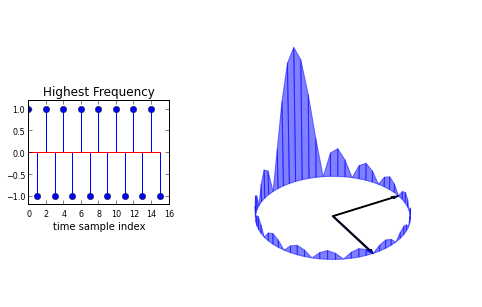

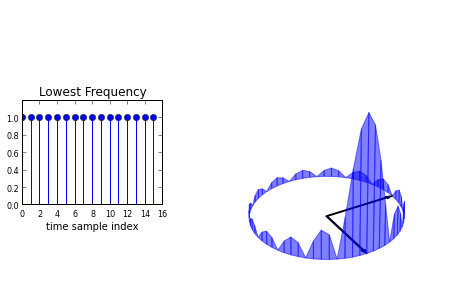

In [9]:
v = matrix(cos(pi*arange(0,16))).T
ax1,ax2=drawInOut(U.H*v,v,return_axes=1)
ax1.set_title('Highest Frequency')
# ax1.figure.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

v = ones((16,1))
ax1,ax2=drawInOut(U.H*v,v,return_axes=1)
ax1.set_title('Lowest Frequency')
# ax1.figure.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

## Summary

In this section, we considered the Discrete Fourier Transform (DFT) using a matrix/vector approach. We used this approach to  develop an intuitive visual vocabulary for the DFT with respect to high/low frequency  and real-valued signals. We used zero-padding to enhance frequency domain signal analysis.

As usual, the corresponding IPython notebook for this post  is available for download [here](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Fourier_Transform.ipynb). 

Comments and corrections welcome!

References
---------------

* Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, (1997).

In [10]:
%qtconsole